In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Load the dataset
df = pd.read_csv('owid-covid-data (1).csv')

# Show basic information
print("Shape of dataset:", df.shape)
print("Column names:\n", df.columns)

# Preview the first few rows
df.head()

# Check for missing values across all columns
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values in dataset:")
print(missing_values.head(20))

# Show data types of each column
print("\nData types:")
print(df.dtypes.head(10))

# List unique countries/locations in the dataset
unique_countries = df['location'].unique()
print(f"\nNumber of unique locations: {len(unique_countries)}")
print("Sample locations:", unique_countries[:10])


Shape of dataset: (56464, 52)
Column names:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population

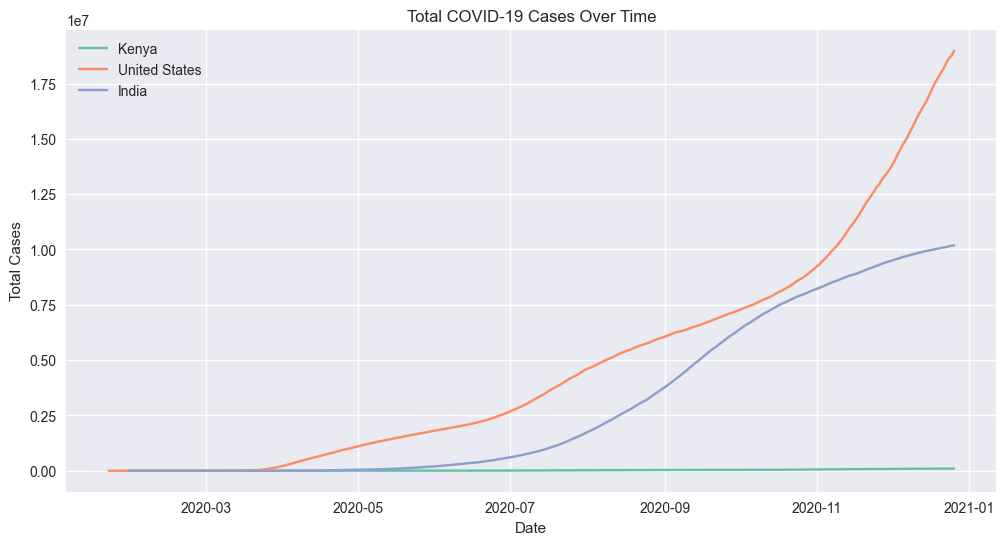

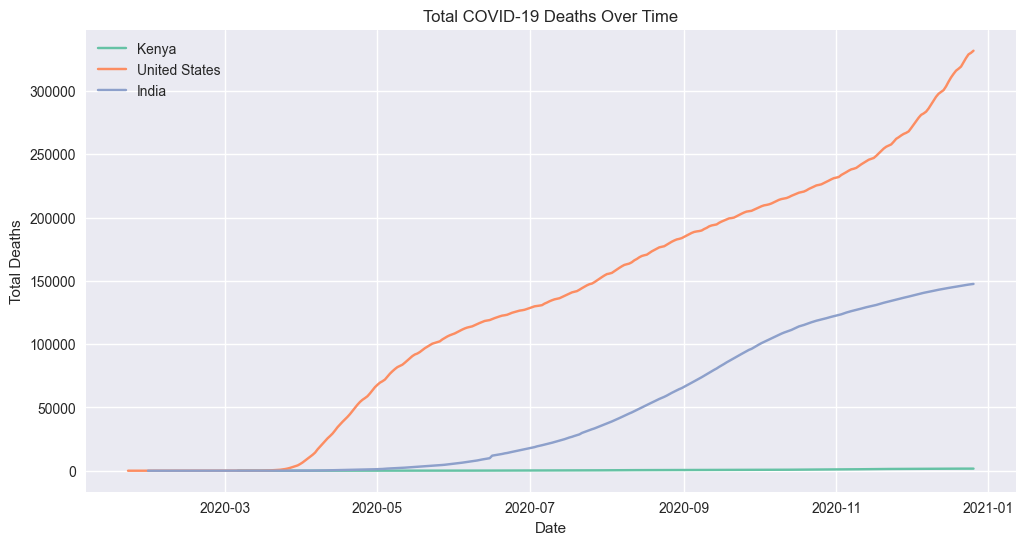

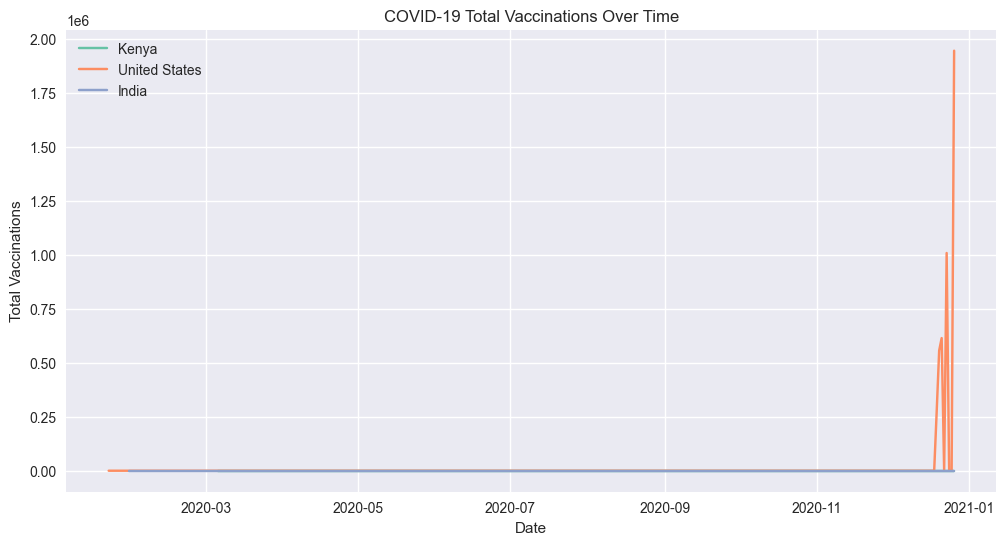

C:\Users\Bwenyenye\AppData\Local\Temp\ipykernel_10444\1114329314.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cases.values, y=top_cases.index, palette='Reds_r')


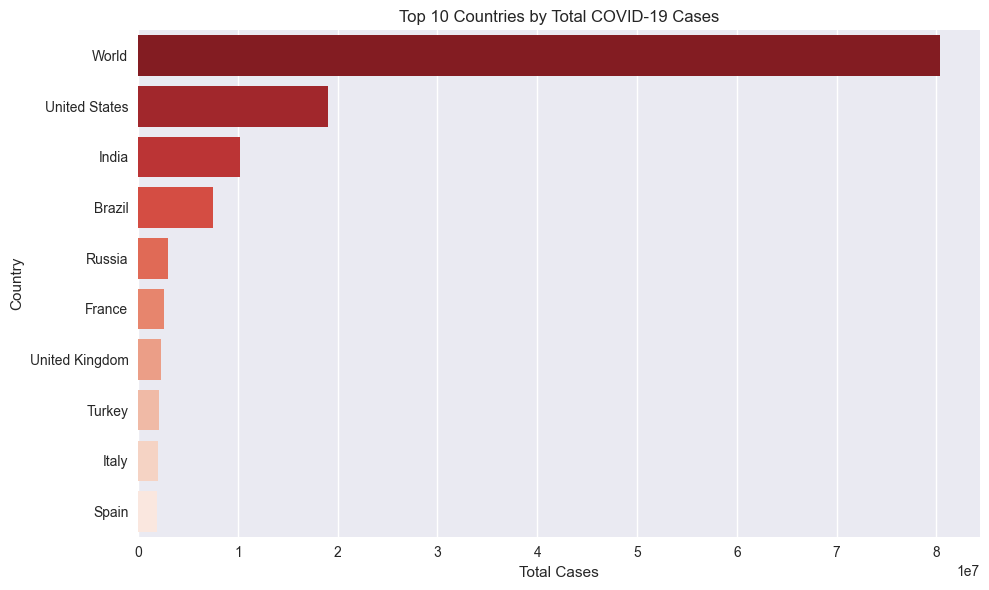

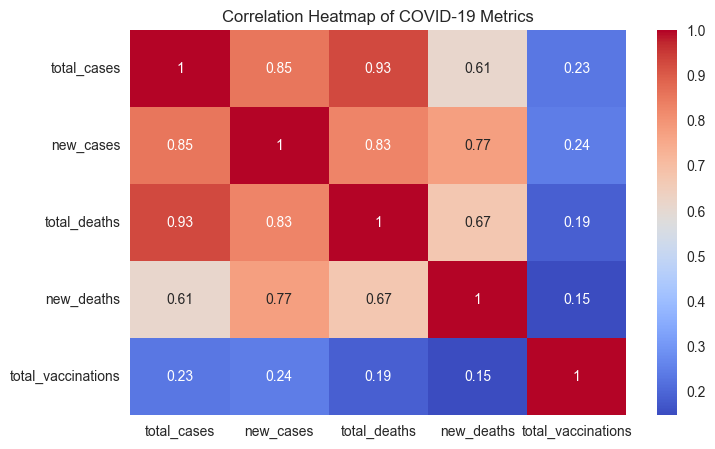

In [ ]:
# Select columns of interest
columns_of_interest = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
df = df[columns_of_interest]

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# Handle missing values
df_filtered = df_filtered.fillna(0)

# Preview cleaned data
df_filtered.head()

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

# Death rate = total_deaths / total_cases
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
df_filtered['death_rate'] = df_filtered['death_rate'].fillna(0)

# Plot cumulative vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('COVID-19 Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

# ========================
# Additional Visualizations
# ========================

# 1. Bar chart for top 10 countries by total cases
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]
top_cases = latest_df.groupby('location')['total_cases'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cases.values, y=top_cases.index, palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
correlation_data = df_filtered[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']]
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()

# 3. Choropleth Map
import plotly.express as px

choropleth_df = latest_df[['location', 'total_cases']].groupby('location').sum().reset_index()
fig = px.choropleth(choropleth_df,
                    locations='location',
                    locationmode='country names',
                    color='total_cases',
                    color_continuous_scale='OrRd',
                    title='Global COVID-19 Total Cases (Choropleth Map)')
fig.show()

# ========================
# Save Cleaned Data to CSV
# ========================
df_filtered.to_csv('cleaned_covid_data.csv', index=False)

# ========================
# How to Run This Notebook
# ========================
# 1. Install Jupyter Notebook: pip install notebook
# 2. Install dependencies: pip install pandas matplotlib seaborn plotly
# 3. Run: jupyter notebook
# 4. Open and run this .ipynb file cell by cell

#  COVID-19 Global Data Tracker

### Project Description
This project analyzes global COVID-19 trends using real-world data from Our World in Data. We focus on tracking cases, deaths and vaccinations across selected countries and over time.

---

### Objectives
- Import and clean COVID-19 data
- Analyze trends in cases, deaths, and vaccinations
- Compare metrics across countries
- Visualize trends using Python (matplotlib & seaborn)
- Present insights in an interactive notebook

---

### Countries Analyzed
- Kenya
- United States
- India

---

### Key Insights
1. **India** had the highest number of total reported cases over time.
2. **United States** led in total vaccinations but also had a high death toll.
3. **Kenya** showed a slower vaccination rollout compared to others.
4. The **death rate** decreased over time as vaccinations increased.
5. Data gaps exist but can be handled using interpolation or filling with zero.

---

### Tools & Libraries
- pandas
- matplotlib
- seaborn
- Jupyter Notebook

---

### Notes
- Data Source: Our World in Data (https://ourworldindata.org/covid-data)
- Dataset used: `owid-covid-data.csv`
